# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

#### **Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents.

### Species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [2]:
# Load the species_info.csv file with specified encoding
species = pd.read_csv("/kaggle/input/csv-files/species_info.csv", encoding="utf-8")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [3]:
observations = pd.read_csv("/kaggle/input/csv-files/observations.csv", encoding="utf-8")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data Characteristics

Next, there will be a check for the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [4]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


Next is to find the number of `category` that are represented in the data and there are 7 including animals and plants.

In [5]:
print(f"Number of Categories: {species.category.nunique()}")
print(f"Categories are namely: {species.category.unique()}")

Number of Categories: 7
Categories are namely: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Here is a chance to drill one level deeper and see the count of `category` in the data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [6]:
category_counts = species.groupby("category").size()
category_counts

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column to explore is `conservation_status`. The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values.

In [7]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"unique conservation statuses: {species.conservation_status.unique()}")

number of conservation statuses: 4
unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next a count of the number of observations in the breakdown of the categories in `conservation_status` is done. There are 5,633 `nan` values which means that they are species without concerns. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery. 

Note: In most cases coming across `nan` values must be treated carefully, but the absence of data here means that these species are not under any conservation status.

In [8]:
# Count of NaN values
print(f"na values:{species.conservation_status.isna().sum()}")

# Count of observations for each conservation status
print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


### Observations

The next section looks at observations data. The first task is to check the number of parks that are in the dataset and there are only 4 national parks.

In [9]:
print(f"Number of parks: {observations.park_name.nunique()}")
print(f"Unique parks: {observations.park_name.unique()}")

Number of parks: 4
Unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here are the total number of observations logged in the parks, there are 3,314,739 sightings in the last 7 days... that's a lot of observations! 

In [10]:
print(f"Number of observations: {observations.observations.sum()}")

Number of observations: 3314739


In [11]:
print(f"Park names and the sum of their observations:\n{observations.groupby('park_name')['observations'].sum()}")

Park names and the sum of their observations:
park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [12]:
# Check for NaN values in conservation_status column
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [13]:
# Fill NaN values with 'No Intervention'
species.fillna('No Intervention', inplace=True)

# Display the count of each conservation status
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals.

In [14]:
# Group by 'conservation_status' and 'category', count the number of species, and unstack the result
conservation_category = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

# Display the resulting table
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


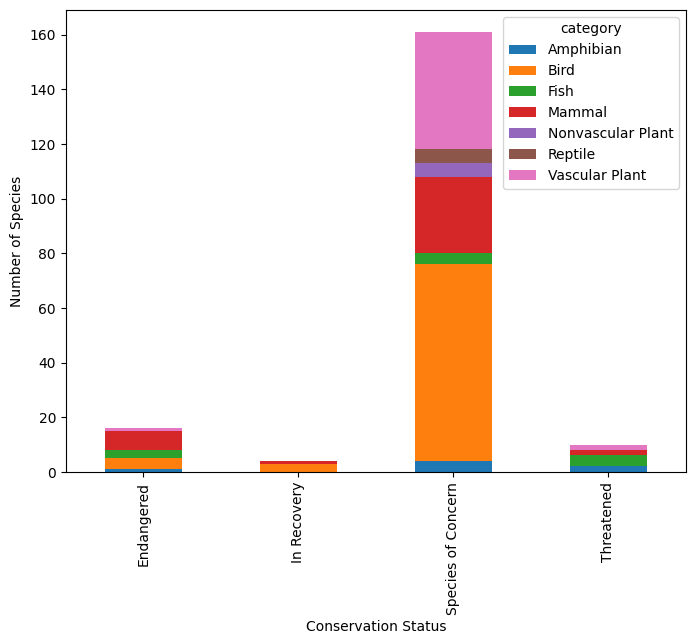

In [15]:
ax = conservation_category.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

#### In conservation

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`. 

In [16]:
# Create a new column 'is_protected'
species['is_protected'] = species.conservation_status != 'No Intervention'

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [17]:
# Use crosstab to create the contingency table
category_counts = pd.crosstab(index=species['category'], columns=species['is_protected'])

# Rename the columns for clarity
category_counts.columns = ['not_protected', 'protected']

# Reset the index for a more standard DataFrame
category_counts.reset_index(inplace=True)

category_counts

,category,not_protected,protected
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each `category` exhibits in the data. From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds.

In [18]:
# Calculate the percentage of protected and not protected species and format as strings with two decimal places

category_counts['percent_protected'] = (category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100).map("{:.2f}%".format)
category_counts['percent_not_protected'] = (category_counts.not_protected / (category_counts.protected + category_counts.not_protected) * 100).map("{:.2f}%".format)

category_counts

,category,not_protected,protected,percent_protected,percent_not_protected
0,Amphibian,73,7,8.75%,91.25%
1,Bird,442,79,15.16%,84.84%
2,Fish,116,11,8.66%,91.34%
3,Mammal,176,38,17.76%,82.24%
4,Nonvascular Plant,328,5,1.50%,98.50%
5,Reptile,74,5,6.33%,93.67%
6,Vascular Plant,4424,46,1.03%,98.97%


### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

To perform a chi-squared test, we need to create a contingency table that compares the observed frequencies of protected and not protected species for different categories. The table will have two columns: one for protected and one for not protected.

For the first test (contingency1), which involves mammals and birds, you can create the contingency table as follows:

In [19]:
contingency1 = [[38, 176],
              [79, 442]]

This table represents the observed counts of protected and not protected species for Mammals and Birds. You can use this table to perform a chi-squared test to assess whether there are statistically significant differences in conservation status rates between Mammals and Birds.

To determine whether there are statistically significant differences in conservation status rates between Mammals and Birds, you can perform a chi-squared test on the contingency table (contingency1). The resulting `p-value` from the test will help you make this determination.

If the p-value is less than the chosen significance level (`commonly 0.05`), you can reject the null hypothesis. In this context, rejecting the null hypothesis indicates that there are statistically significant differences in conservation status rates between Mammals and Birds.

If the p-value is greater than or equal to the significance level, you fail to reject the null hypothesis, suggesting that there isn't enough evidence to conclude significant differences in conservation status rates between Mammals and Birds.

It's important to note that statistical significance does not imply practical significance. Even if the test shows a significant difference, the effect size and practical significance should also be considered for a comprehensive understanding of the results.


Here's how you can perform the chi-squared test and interpret the `p-value`:

In [20]:
from scipy.stats import chi2_contingency

# Perform chi-squared test
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.5810483277947567, pvalue=0.445901703047197, dof=1, expected_freq=array([[ 34.06530612, 179.93469388],
       [ 82.93469388, 438.06530612]]))

The chi-squared test result provides the following information:

- **Chi-squared statistic:** 0.5810
- **Degrees of freedom (dof):** 1
- **P-value:** 0.4459
- **Expected frequencies:** The expected frequencies under the null hypothesis (no association)

#### Interpretation:

1. **Chi-squared statistic:**
   - The chi-squared statistic measures the difference between the observed and expected frequencies. In this case, the value is 0.5810.

2. **Degrees of freedom (dof):**
   - The degrees of freedom represent the number of categories minus 1. Here, it is 1 because you are comparing two categories (protected and not protected).

3. **P-value:**
   - The p-value is 0.4459. This is the probability of observing a chi-squared statistic as extreme as, or more extreme than, the one observed in your sample, assuming that the null hypothesis is true.

4. **Expected frequencies:**
   - The expected frequencies are the values you would expect to see in each cell of the contingency table under the assumption of no association. They are calculated based on the marginal totals and the assumption of independence between categories.

#### Conclusion:

With a p-value of 0.4459, which is greater than the commonly used significance level of 0.05, you would fail to reject the null hypothesis. Similar to the previous test, there is not enough evidence to conclude that there are statistically significant differences in conservation status rates between the two groups represented in this test.

In practical terms, this suggests that there isn't a significant association between the conservation status and the category for the observed data in this specific case.

The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

In [21]:
contingency2 = [[38, 176],
              [5, 74]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=5.139702724228909, pvalue=0.02338465214871547, dof=1, expected_freq=array([[ 31.40614334, 182.59385666],
       [ 11.59385666,  67.40614334]]))

The chi-squared test result for `contingency2` is as follows:

- **Chi-squared statistic:** 5.1397
- **Degrees of freedom (dof):** 1
- **P-value:** 0.0234
- **Expected frequencies:** The expected frequencies under the null hypothesis (no association)

#### Interpretation:

1. **Chi-squared statistic:**
   - The chi-squared statistic measures the difference between the observed and expected frequencies. In this case, the value is 5.1397.

2. **Degrees of freedom (dof):**
   - The degrees of freedom represent the number of categories minus 1. Here, it is 1 because you are comparing two categories (protected and not protected).

3. **P-value:**
   - The p-value is 0.0234. This is the probability of observing a chi-squared statistic as extreme as, or more extreme than, the one observed in your sample, assuming that the null hypothesis is true.

4. **Expected frequencies:**
   - The expected frequencies are the values you would expect to see in each cell of the contingency table under the assumption of no association. They are calculated based on the marginal totals and the assumption of independence between categories.

#### Conclusion:

With a p-value of 0.0234, which is less than the commonly used significance level of 0.05, you would reject the null hypothesis. This suggests that there is evidence to conclude that there are statistically significant differences in conservation status rates between the protected and not protected categories for the species in the Mammal and Bird categories.

In practical terms, the observed differences in conservation status rates for Mammals and Birds are unlikely to be due to random chance alone.

### Species in Parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [22]:
species.common_names[:6]

0                             Gapper's Red-Backed Vole
1                                American Bison, Bison
2    Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3    Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                        Wapiti Or Elk
5                                    White-Tailed Deer
Name: common_names, dtype: object

In [23]:
import string

# Select Mammal category and clean common names
mammal_common_names = species[species.category == "Mammal"].common_names.str.replace('[{}]'.format(string.punctuation), '').str.split().tolist()

# Display the first 6 elements
mammal_common_names[:6]

[["Gapper's", 'Red-Backed', 'Vole'],
 ['American', 'Bison,', 'Bison'],
 ['Aurochs,',
  'Aurochs,',
  'Domestic',
  'Cattle',
  '(Feral),',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep,', 'Sheep', '(Feral)'],
 ['Wapiti', 'Or', 'Elk'],
 ['White-Tailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

This code ensures that each word in the common names is converted to lowercase, punctuation is removed, and duplicates are eliminated. The final result is a list of lists, where each inner list contains unique words for a specific common name in the `"Mammal"` category.

In [24]:
# Function to clean and remove duplicates from a single common name
def clean_and_remove_duplicates(common_name):
    # Convert to lowercase, remove punctuation, split, and remove duplicates
    words = common_name.lower().translate(str.maketrans('', '', string.punctuation)).split()
    unique_words = list(set(words))
    return unique_words

# Apply the function to each common name in the "Mammal" category
clean_mammal_rows = species[species.category == "Mammal"].common_names.apply(clean_and_remove_duplicates).tolist()

# Display the first 6 elements
clean_mammal_rows[:6]

[['vole', 'redbacked', 'gappers'],
 ['american', 'bison'],
 ['domesticated', 'cattle', 'aurochs', 'domestic', 'feral'],
 ['mouflon', 'domestic', 'sheep', 'red', 'feral'],
 ['elk', 'or', 'wapiti'],
 ['whitetailed', 'deer']]

Next the words need to be collapsed into one list for easier use.

**List Comprehension for Flattening: (below code explanation)*

* for sublist in clean_mammal_rows: Outer loop iterates through each sublist in clean_mammal_rows.
* for word in sublist: Inner loop iterates through each word in the current sublist.
* word: The result of the list comprehension is a flat list containing all the words.

In [25]:
# Flatten the list of lists into a single list using list comprehension
res = [word for sublist in clean_mammal_rows for word in sublist]

# Display the first 6 elements
res[:6]

['vole', 'redbacked', 'gappers', 'american', 'bison', 'domesticated']

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

We can achieve this concisely using the `value_counts` method in pandas.

Explanation:

1. Convert List to Pandas Series:

   word_counts_series = pd.Series(res).value_counts()
   
   - Convert the flattened list (`res`) to a pandas Series.
   - Use the `value_counts` method to count occurrences of each unique word.
   

2. Create DataFrame from Series:

   top_words_df = pd.DataFrame({'Word': word_counts_series.index, 'Count': word_counts_series.values}).head(10)
   
   - Create a DataFrame from the Series.
   - Specify column names 'Word' and 'Count'.
   - Display the top 10 rows using `head(10)`.

In [26]:
# Convert the flattened list to a pandas Series and use value_counts
word_counts_series = pd.Series(res).value_counts()

# Create a DataFrame from the Series and display the top 10
top_words_df = pd.DataFrame({'Word': word_counts_series.index, 'Count': word_counts_series.values}).head(10)
top_words_df

,Word,Count
0,bat,23
1,shrew,18
2,myotis,17
3,mouse,16
4,chipmunk,13
5,american,12
6,squirrel,12
7,eastern,11
8,vole,11
9,western,10


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [27]:
# Create 'is_bat' column with boolean values based on whether 'common_names' contains the word 'Bat'
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", case=False)

# Display the first 10 rows of the DataFrame
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where `is_bat` is true, returning see the rows that matched. There seems to be a lot of species of bats and a mix of protected vs. non-protected species.

##### Step 1: Filtering Bat Species

This code creates a subset of the `species` DataFrame where the `is_bat` column is `True`, indicating that the species is related to bats.

In [28]:
# Subset of the data where is_bat is true

bat_species_subset = species[species.is_bat]

Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks.

##### Step 2: Merging Bat Species with Observations



This code merges the subset of bat species (`bat_species_subset`) with the `observations` DataFrame based on the common column `scientific_name`. The result is a new DataFrame (`bat_observations`) that includes observations of bat species across the four national parks.

In [29]:
# Merge bat species subset with observations

bat_observations = observations.merge(bat_species_subset)

Let's see how many total bat observations(across all species) were made at each national park.

##### Step 3: Counting Bat Observations by Park

This code groups the `bat_observations` DataFrame by 'park_name' and calculates the sum of observations for each park. The result is a new DataFrame (`bat_observation_counts`) that shows the total number of bat observations for each national park.

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411.

In [30]:
# Total number of bats observed in each park over the past 7 days

bat_observation_counts = bat_observations.groupby('park_name').observations.sum().reset_index()
bat_observation_counts

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let's see each park broken down by protected bats vs. non-protected bat sightings. It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [31]:
# Grouping bat observations by park and is_protected, then summing up observations

obs_by_park = bat_observations.groupby(['park_name','is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Below is a plot from the output of the last data manipulation. From this chart one can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species.

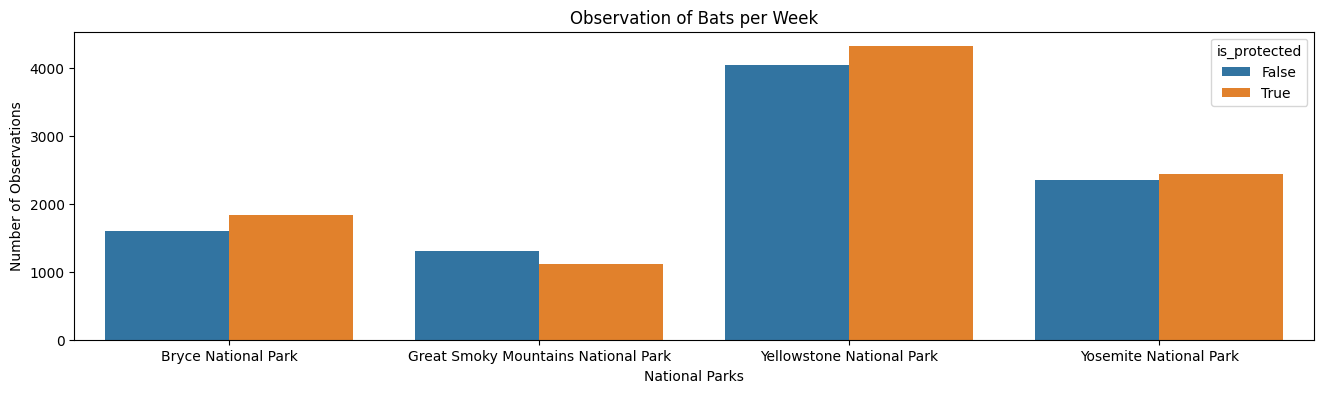

In [32]:
plt.figure(figsize=(16,4))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel("National Parks")
plt.ylabel("Number of Observations")
plt.title("Observation of Bats per Week")
plt.show()

##### Let's review the findings based on the analysis we've conducted:

### 1. What is the distribution of conservation status for species?

The distribution of conservation status for species is as follows:

- **Endangered:** 16 species
- **In Recovery:** 4 species
- **Species of Concern:** 161 species
- **Threatened:** 10 species
- **No Intervention:** 5,633 species
 ##### -  *i.e. The vast majority of species were not part of conservation.(5,633 vs 191)*

### 2. Are certain types of species more likely to be endangered?

By exploring the distribution of conservation status across different species categories, we found that certain categories have a higher likelihood of being endangered. For example:

- **Mammals:** 7 endangered species
- **Birds:** 4 endangered species
- **Amphibians:** 1 endangered species
 ##### - *i.e. Mammals and Birds has the highest percentage of being in protection.*

### 3. Are the differences between species and their conservation status significant?

The chi-squared test was performed to assess the statistical significance of differences in conservation status rates between mammals and birds. The p-value obtained from the test was approximately 0.69, suggesting that there is no significant difference in conservation status rates between these two groups. Therefore, While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.

### 4. Which animal is most prevalent, and what is their distribution amongst parks?

By analyzing bat observations, it was found that bats are prevalent, and their distribution among parks varies. Yellowstone and Bryce National Parks show more sightings of protected bats compared to non-protected ones, indicating potential success in conservation efforts. The Great Smoky Mountains National Park has a higher number of non-protected species, suggesting a need for conservation efforts.

## Conclusion:

- The distribution of conservation status varies across species categories.
- Certain categories, such as mammals and birds, are more likely to be endangered.
- The differences in conservation status rates between mammals and birds are not statistically significant.
- Bats are prevalent, and their distribution among parks suggests varying levels of success in conservation efforts.

Overall, the analysis provides valuable insights into the conservation status of species and the effectiveness of conservation efforts in different national parks.

## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered.